In [2]:
%pylab inline
import numpy as np
import csv
from scipy import linalg
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
def least_squares(A, b):
    return np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)

In [4]:
lines = []
with open('SNAP.csv', 'r') as f:
    for line in f.readlines():
        l,name = line.strip().split(',')
        lines.append((l,name))

len(lines)

number_of_data_points = len(lines)#-60
snap_stock_data = np.zeros([number_of_data_points-60,2])
for i in range(number_of_data_points-60):
    snap_stock_data[i,1] = float(lines[number_of_data_points - 1 - i][1])
    snap_stock_data[i,0] = i + 1

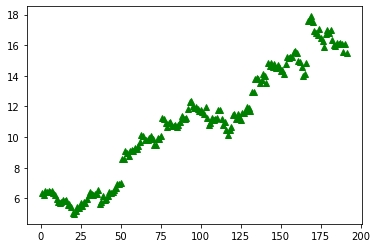

In [5]:
plt.plot(snap_stock_data[:,0], snap_stock_data[:,1], 'g^')

In [6]:
def predict_with_degree(deg):
    assert deg >= 1 and isinstance(deg, int)
    a1 = (snap_stock_data[:,0]).reshape([number_of_data_points-60,1])
    a2 = np.ones([number_of_data_points-60,1])
    tup = [a1, a2]
    on = a1
    for i in range(deg-1):
        on = a1 * on
        tup.insert(0, on)
    A = np.hstack(tuple(tup))
    b = (snap_stock_data[:,1]).reshape([number_of_data_points-60,1])
    A, b = A[:80], b[:80]
    x = least_squares(A,b)
    print(x)
    d = snap_stock_data[:,0]
    have = x[0]
    for i in range(1,deg+1):
        have = have * d
        have = have + x[i]
    return have

[[-3.61288262e-05]
 [ 5.87096125e-03]
 [-1.92154514e-01]
 [ 7.20179813e+00]]


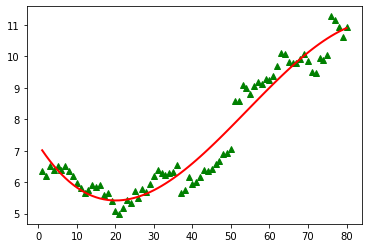

In [20]:
#y_new = snap_stock_data[:,0] * (a*np.square(snap_stock_data[:,0]) + b * snap_stock_data[:,0] + c) + d
y_new = predict_with_degree(3)
plt.plot(snap_stock_data[:80,0], snap_stock_data[:80,1], 'g^')
plt.plot(snap_stock_data[:80,0], y_new[:80], 'r', linewidth=2.0)
plt.show()

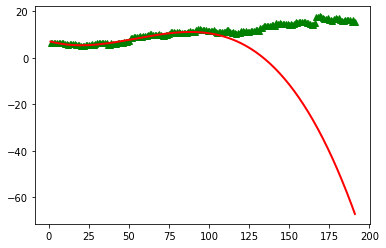

In [21]:
plt.plot(snap_stock_data[:,0], snap_stock_data[:,1], 'g^')
plt.plot(snap_stock_data[:,0], y_new, 'r', linewidth=2.0)
plt.show()

In [10]:
predict_vec = [i for i in range(130,140)]
# predict_vec

In [11]:
prediction = m * predict_vec + c

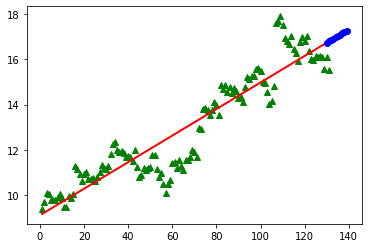

In [12]:
plt.plot(snap_stock_data[:,0], snap_stock_data[:,1], 'g^')
plt.plot(snap_stock_data[:,0], y_new, 'r', linewidth=2.0)
plt.plot(predict_vec, prediction, 'bo', linewidth=2.0)
plt.show()